# TITANIC-EDA

Dataset https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

At this time, I will try to do Data Preprocessing first so that the data becomes clean and good to use. After the Data Preprocessing is done, Exploratory Data Analysis is carried out which will get useful insights, including:
> - How many passengers are still alive?
> - What gender is the most victimized?
> - What age has survived the most?
> - Is the passenger class aware of safety?

## DESCRIPTION

> Input Variable
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	

> Output Variable
- survival - Survival	0 = No, 1 = Yes

> Variable Notes

> pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

> age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

> sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

> parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

## IMPORT LIBRARY

In [1]:
# import all library nya
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import warnings 
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

## OVERVIEW

> Load dataset: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

In [3]:
# Check column names
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
# Information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
# Check the first 5 rows of the data frame
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# Check the last 5 rows of the data frame
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [7]:
# summary dari setiap features pada dataset ini
pd.DataFrame({'dataFeatures' : df.columns, 'dataType' : df.dtypes.values, 
              'null' : [df[i].isna().sum() for i in df.columns],
              'nullPct' : [((df[i].isna().sum()/len(df[i]))*100).round(1) for i in df.columns],
              'Nunique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample(2)) for i in df.columns]}).reset_index(drop = True)

,dataFeatures,dataType,null,nullPct,Nunique,uniqueSample
0,survived,int64,0,0.0,2,"[1, 0]"
1,pclass,int64,0,0.0,3,"[3, 2]"
2,sex,object,0,0.0,2,"[male, female]"
3,age,float64,177,19.9,88,"[0.83, 54.0]"
4,sibsp,int64,0,0.0,7,"[5, 0]"
5,parch,int64,0,0.0,7,"[4, 0]"
6,fare,float64,0,0.0,248,"[41.5792, 14.4583]"
7,embarked,object,2,0.2,3,"[nan, C]"
8,class,object,0,0.0,3,"[Second, First]"
9,who,object,0,0.0,3,"[child, man]"


> There are **Null Values** on some features.

In [8]:
# Data with Null values
df.shape

(891, 15)

In [9]:
# describe() to see a measure of central tendency, quantile, min dan max on each features.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
# Below this describe() for categorical data that show count data, unique (count of unique data), top (most frequrntly), dan freq (numbers appear).
df.describe(include = 'object').T

,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
class,891,3,Third,491
who,891,3,man,537
deck,203,7,C,59
embark_town,889,3,Southampton,644
alive,891,2,no,549


> From the data above, it can be seen that there are some features that have data types that are still not correct. We will fix it in preprocessing.

## PREPROCESSING
> We drop data that is not important for EDA and Machine Learning processes. After that group the data by type.

> We can replace null values on age column using ffill()

> We can add the 'Survival_cat' column which previously had the numeric data type to object so that it can be included in the Categorical Features

In [11]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

> In the dataset, there are several columns that have missing values, including
> - decks : 688
> - age : 177
> - embarked : 2
> - embark_town : 2

> In the deck column, almost 75% of the data is lost, so the deck column will be deleted. Meanwhile, in the column age, embarked, and embark_town, data will be filled in using the ffill method

In [12]:
df.drop(columns = ['deck','embarked','embark_town'], axis = 1, inplace = True)


In [13]:
df.isnull().sum().sort_values(ascending=False)

age           177
survived        0
pclass          0
sex             0
sibsp           0
parch           0
fare            0
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

> Let's start to fill null values on "age" column

In [14]:
df_age_null = df[df["age"].isna()]
df_age_notnull = df[df["age"].notna()]

In [15]:
df_age_notnull.groupby(["sex"], as_index=False)["age"].mean()

,sex,age
0,female,27.915709
1,male,30.726645


In [16]:
age = []
for sex in (df_age_null["sex"]):
    if sex == "female":
        age.append(28)
    else :
        age.append(30)

> In the code above we will enter "age" data based on the average age grouped by Sex

In [17]:
df_age_null["age"] = age

In [18]:
# check null values
df_merged = pd.concat([df_age_notnull, df_age_null])
df_merged

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,30.0,0,0,7.2292,Third,man,True,no,True
863,0,3,female,28.0,8,2,69.5500,Third,woman,False,no,False
868,0,3,male,30.0,0,0,9.5000,Third,man,True,no,True
878,0,3,male,30.0,0,0,7.8958,Third,man,True,no,True


> So there is no null values on "age" column

In [19]:
# turn df_merged into df
df = df_merged

> Now, we will replace some values ​​in Numeric datatype and Object datatype

In [20]:
#replace datatype survived
df['survived_cat'] = df["survived"].replace({
    1:"Alive",
    0:"Death"
})

In [21]:
#replace datatype survived
df['pclass'] = df["pclass"].replace({
    1:"1st",
    2:"2nd",
    3:"3rd"
})

> Let's look the data

In [22]:
# summary dari setiap features pada dataset ini
pd.DataFrame({'Features' : df.columns, 'dataType' : df.dtypes.values, 
              'nullvalues' : [df[i].isna().sum() for i in df.columns],
              'unique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample(1)) for i in df.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,survived,int64,0,2,[1]
1,pclass,object,0,3,[3rd]
2,sex,object,0,2,[female]
3,age,float64,0,88,[14.0]
4,sibsp,int64,0,7,[8]
5,parch,int64,0,7,[2]
6,fare,float64,0,248,[52.5542]
7,class,object,0,3,[Second]
8,who,object,0,3,[child]
9,adult_male,bool,0,2,[False]


> all columns have the appropriate data type

## EXPLORATORY DATA ANALYSIS

> so, let's start analyze

### TARGET FEATURE

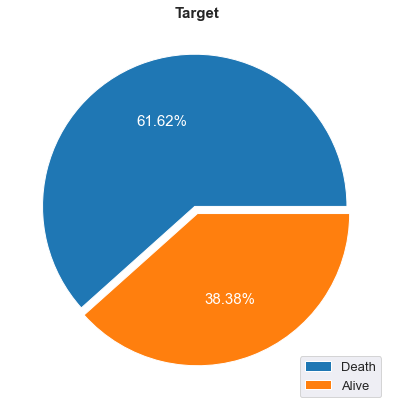

In [23]:
plt.figure(figsize = (7,7))
plt.title('Target', size = 15, fontweight = 'bold')
labels = 'Death', 'Alive'
plt.pie(df['survived_cat'].value_counts(), autopct = '%.2f%%', 
        textprops = {'fontsize' : 15, 'color' : 'white'}, explode = (0.05,0))
plt.legend(labels, loc='lower right', fontsize = 13)
plt.show()

In [24]:
df['survived_cat'].value_counts()

Death    549
Alive    342
Name: survived_cat, dtype: int64

> Seen in the pie chart above, as many as 61.62% (549) of passengers died and passengers who were alive were 38.38% (342) of the total data.

### NUMERICAL FEATURES

> First we can make a heatmap first to see the correlation on each feature

<AxesSubplot:>

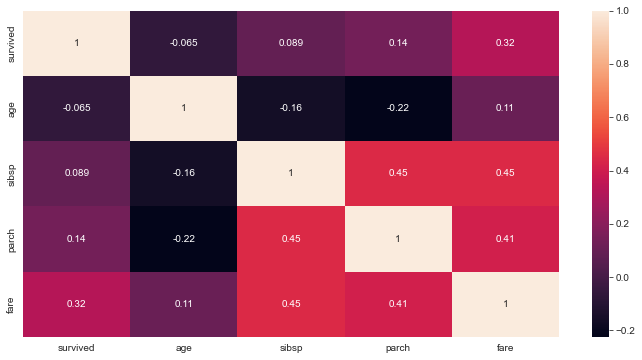

In [25]:
plt.figure(figsize = (12,6))
sns.heatmap(df.select_dtypes(['int64', 'float64']).corr('spearman'), annot = True)

> From the heat map above we can see that the highest correlation is in "parch" with "sibsp" and "fare" with "sibsp". After chose the column that has a correlation, now we make a joinplot to see the existing pattern.

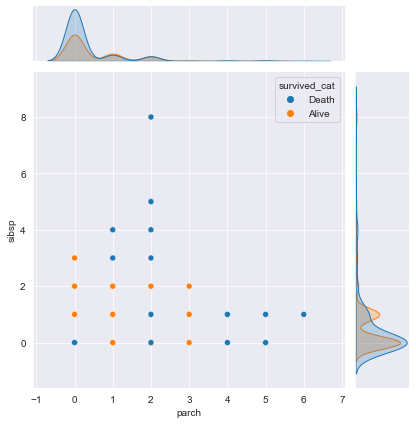

In [26]:
sns.jointplot(x=df['parch'], y=df['sibsp'], data=df, hue='survived_cat')

> From the above joinplot, it can be seen that the number of passengers who have "parch" and "sibsp" is > 3

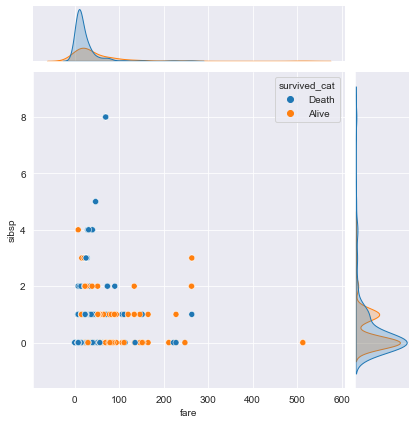

In [27]:
sns.jointplot(x=df['fare'], y=df['sibsp'], data=df, hue='survived_cat')

> From the pairplot above, we don't find any pattern on the passengers because the data are **pile in the same area**.

> For that, we will analyze for each numerical feature

> We can create functions to simplify data visualization

In [28]:
def plot_num(segment_by,target_var = "survived_cat"):
    survived_y = df[(df['survived_cat'] == 'Alive')][segment_by]
    survived_n = df[(df['survived_cat'] == 'Death')][segment_by]

    plt.figure(figsize=(10,5))  
    plt.title("Distribution of Survived Passenger by "+segment_by)
    plt.ylabel("Frequency")
    
    ax = sns.kdeplot(survived_y,shade=True,color='#008000')
    ax = sns.kdeplot(survived_n,shade=True,color='#ff0000')
    ax.legend(['Alive','Death'])

    plt.show()

    print("Alive by ",segment_by)
    print(survived_y.value_counts().head(3))
    print('-----------------------------')
    print("Death by ",segment_by)
    print(survived_n.value_counts().head(3))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 888
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   pclass        891 non-null    object 
 2   sex           891 non-null    object 
 3   age           891 non-null    float64
 4   sibsp         891 non-null    int64  
 5   parch         891 non-null    int64  
 6   fare          891 non-null    float64
 7   class         891 non-null    object 
 8   who           891 non-null    object 
 9   adult_male    891 non-null    bool   
 10  alive         891 non-null    object 
 11  alone         891 non-null    bool   
 12  survived_cat  891 non-null    object 
dtypes: bool(2), float64(2), int64(3), object(6)
memory usage: 117.6+ KB


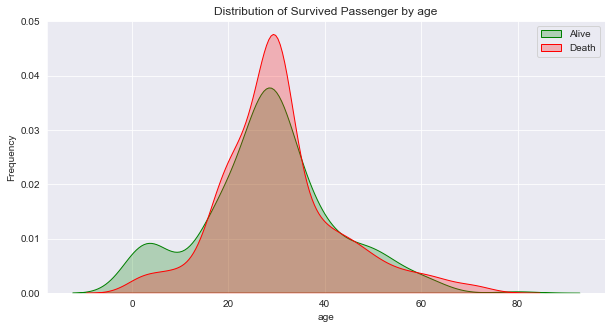

Alive by  age
28.0    43
30.0    26
24.0    15
Name: age, dtype: int64
-----------------------------
Death by  age
30.0    123
28.0     35
21.0     19
Name: age, dtype: int64


In [30]:
plot_num(segment_by='age')

> Passengers aged < 20 (children to teenagers) are passengers whose safety is prioritized over adults aged between 20-40 years. Likewise, passengers aged > 40 years who managed to survive. Rescue priority is given to children, youth, and seniors. However, we can see some seniors aged > 60 years do not survive. This can happen due to the physical condition of the elderly passengers who do not have the ability to save themselves.

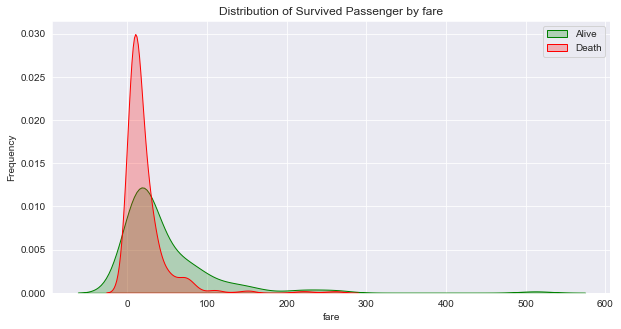

Alive by  fare
13.00    16
26.00    15
7.75     12
Name: fare, dtype: int64
-----------------------------
Death by  fare
8.0500     38
7.8958     37
13.0000    26
Name: fare, dtype: int64


In [31]:
plot_num(segment_by='fare')

> Passengers with fares > $13 are more likely to survive than those with fares < $13

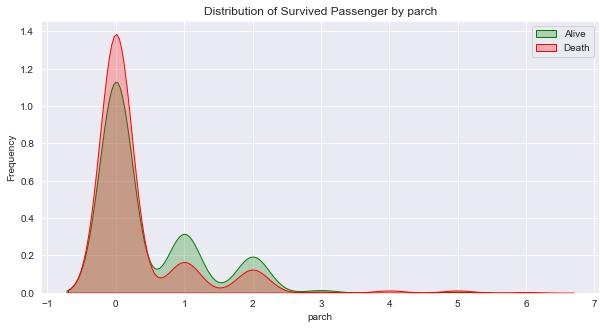

Alive by  parch
0    233
1     65
2     40
Name: parch, dtype: int64
-----------------------------
Death by  parch
0    445
1     53
2     40
Name: parch, dtype: int64


In [32]:
plot_num(segment_by='parch')

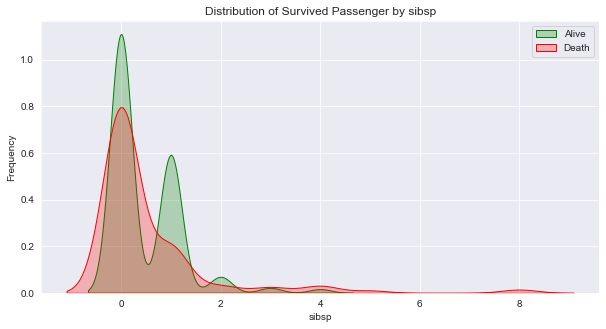

Alive by  sibsp
0    210
1    112
2     13
Name: sibsp, dtype: int64
-----------------------------
Death by  sibsp
0    398
1     97
4     15
Name: sibsp, dtype: int64


In [33]:
plot_num(segment_by='sibsp')

### CATEGORICAL FEATURES

> Same as numerical features, we will create a heatmap to find correlations.

In [34]:
# cramers untuk categorical feature correlation
def cramersv(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

In [35]:
corr = []
for i in df.select_dtypes(['object']):
    matrix = []
    for j in df.select_dtypes(['object']):
        matrix.append(cramersv(df.select_dtypes(['object'])[i], df.select_dtypes(['object'])[j]))
    corr.append(matrix)

corr_cat = pd.DataFrame(corr, index = df.select_dtypes(['object']).columns, columns = df.select_dtypes(['object']).columns)

<AxesSubplot:>

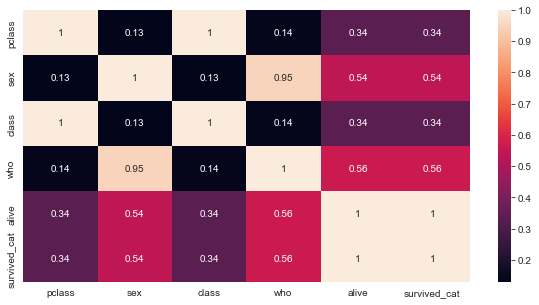

In [36]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr_cat, annot=True)

> In the heatmap above we can see that there is a strong correlation between "class" and "pclass" and "survived_cat" and "alive". However, the two correlations are columns with the same value, therefore we will look for patterns in the correlation between "who" and "sex" which reaches 0.95.

In [37]:
pd.crosstab(df['who'], df['sex'], normalize = 'columns')

sex,female,male
who,,
child,0.136943,0.069324
man,0.000000,0.930676
woman,0.863057,0.000000


> For man and woman have data with the same value. However, when compared to children, most passengers are adults than children.

> We will analyze some of the Categorical Features. For that, we will create a function to make it easier to visualize the data.

In [38]:
def cat_plot(segment_by,target_var ="survived_cat"):
    survived_y = df[(df['survived_cat'] == 'Alive')][segment_by]
    survived_n = df[(df['survived_cat'] == 'Death')][segment_by]

    plt.figure(figsize=(10,5))
    sns.countplot(x =segment_by,data=df.select_dtypes(['object']),hue=target_var)
    plt.xticks(rotation=45)
    plt.title("Count of "+segment_by)
    plt.show()
    
    print("Alive by ",segment_by)
    print(survived_y.value_counts().head(3))
    print('-----------------------------')
    print("Death by ",segment_by)
    print(survived_n.value_counts().head(3))

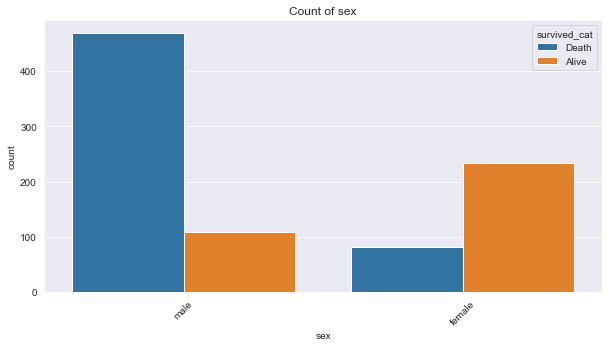

Alive by  sex
female    233
male      109
Name: sex, dtype: int64
-----------------------------
Death by  sex
male      468
female     81
Name: sex, dtype: int64


In [39]:
cat_plot(segment_by='sex')

> It can be seen in the countplot above that the surviving passengers are dominated by female compared to male. This could be based on a rescue procedure that prioritizes women over men.

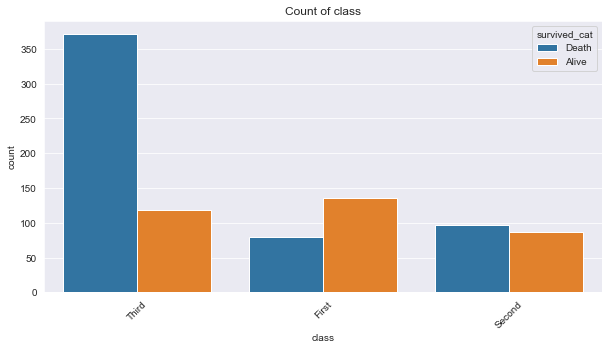

Alive by  class
First     136
Third     119
Second     87
Name: class, dtype: int64
-----------------------------
Death by  class
Third     372
Second     97
First      80
Name: class, dtype: int64


In [40]:
cat_plot(segment_by='class')

> First class passengers had 136 safe passengers. Meanwhile, the passengers who experienced many deaths were in the third class. This can happen if the rescue procedure is carried out by prioritizing passengers who are in first class.

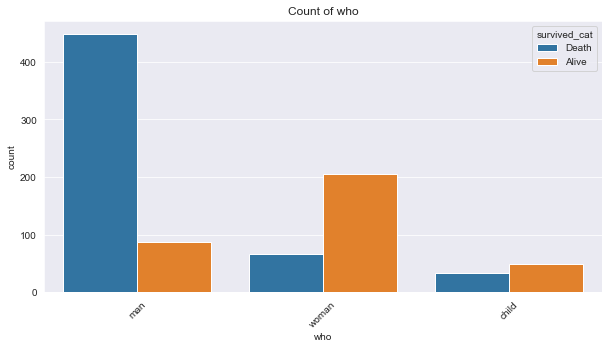

Alive by  who
woman    205
man       88
child     49
Name: who, dtype: int64
-----------------------------
Death by  who
man      449
woman     66
child     34
Name: who, dtype: int64


In [41]:
cat_plot(segment_by='who')

> Passengers who survived were dominated by women. But Passengers who died were dominated by man. Survived by "who" may have a relationship with "sex" which prioritizes women.

## SUMMARY

By analyzing the Titanic dataset, we can answer the questions that were created earlier.
> How many passengers are still alive?
- based on the pie chart, there are 342 passengers who survived
> What gender is the most victimized?
- The most victimized gender is male
> What age has survived the most?
- Most of the passengers who survived were in the age range < 20 years and some were seniors with the age of 40-60 years
> Is the passenger class aware of safety?
- Yes, surviving passengers are generally in first class. The higher the class you have, the greater the chance of survival.